In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def fft_analysis(signal):
    slope, intercept = np.polyfit(np.arange(len(signal)), signal, 1)
    trend = np.arange(len(signal)) * slope + intercept
    detrended = signal - trend
    fft_values = np.fft.fft(detrended)
    frequencies = np.fft.fftfreq(len(fft_values))
    # Remove negative frequencies and sort
    positive_frequencies = frequencies[frequencies > 0]
    magnitudes = np.abs(fft_values)[frequencies > 0]
    # Identify dominant frequency
    dominant_frequency = positive_frequencies[np.argmax(magnitudes)]
    #print(f"Dominant Frequency: {dominant_frequency:.3f}")
    # Convert frequency to period (e.g., days, weeks, months, etc.)
    dominant_period = 1 / dominant_frequency
    #print(f"Dominant Period: {dominant_period:.2f} time units")
    return dominant_frequency

In [3]:
import os

def process_file(file_path):
    data = pd.read_csv(file_path)

    # Ajustar los nombres de columnas si es necesario
    data.columns = [
        "tachometer",
        "acc_under_axial",
        "acc_under_radiale",
        "acc_under_tangencial",
        "acc_over_axial",
        "acc_over_radiale",
        "acc_over_tangencial",
        "microphone",
    ]

    # Diccionario para estadísticas
    statistics_dict = {}

    for col in data.columns:
        statistics_dict[f'{col}_mean'] = data[col].mean()
        statistics_dict[f'{col}_median'] = data[col].median()
        statistics_dict[f'{col}_std'] = data[col].std()
        statistics_dict[f'{col}_variance'] = data[col].var()
        statistics_dict[f'{col}_range'] = data[col].max() - data[col].min()
        statistics_dict[f'{col}_skewness'] = data[col].skew()
        statistics_dict[f'{col}_kurtosis'] = data[col].kurt()
        statistics_dict[f'{col}_dominant_frequency'] = fft_analysis(data[col])

    # Añadir etiqueta basada en la ruta del archivo
    label = "_".join(os.path.normpath(file_path).split(os.sep)[-3:-1])  # Ajustar según la estructura
    statistics_dict['label'] = label

    return statistics_dict

# Recorrer todas las carpetas y procesar los archivos
def process_directory(root_dir):
    all_statistics = []

    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(subdir, file)
                print(f"Procesando archivo: {file_path}")
                try:
                    stats = process_file(file_path)
                    all_statistics.append(stats)
                except Exception as e:
                    print(f"Error procesando {file_path}: {e}")

    # Combinar todos los resultados en un solo DataFrame
    combined_df = pd.DataFrame(all_statistics)
    return combined_df

# Ruta principal donde están las carpetas
root_dir = './bearing_fault_detection_reduced'
output_csv_path = 'combined_statistics.csv'

# Procesar directorio y guardar resultados
combined_df = process_directory(root_dir)
combined_df.to_csv(output_csv_path, index=False)

print(f"Archivo combinado guardado en: {output_csv_path}")


Procesando archivo: ./bearing_fault_detection_reduced\horizontal-misalignment\0.5mm\12.288.csv
Dominant Frequency: 0.000
Dominant Period: 4166.65 time units
Dominant Frequency: 0.000
Dominant Period: 9999.96 time units
Dominant Frequency: 0.000
Dominant Period: 9999.96 time units
Dominant Frequency: 0.000
Dominant Period: 9999.96 time units
Dominant Frequency: 0.000
Dominant Period: 9999.96 time units
Dominant Frequency: 0.000
Dominant Period: 9999.96 time units
Dominant Frequency: 0.000
Dominant Period: 9999.96 time units
Dominant Frequency: 0.443
Dominant Period: 2.26 time units
Procesando archivo: ./bearing_fault_detection_reduced\horizontal-misalignment\0.5mm\30.3104.csv
Dominant Frequency: 0.001
Dominant Period: 1689.18 time units
Dominant Frequency: 0.441
Dominant Period: 2.27 time units
Dominant Frequency: 0.441
Dominant Period: 2.27 time units
Dominant Frequency: 0.441
Dominant Period: 2.27 time units
Dominant Frequency: 0.000
Dominant Period: 35714.14 time units
Dominant Frequ

<Figure size 1000x600 with 0 Axes>

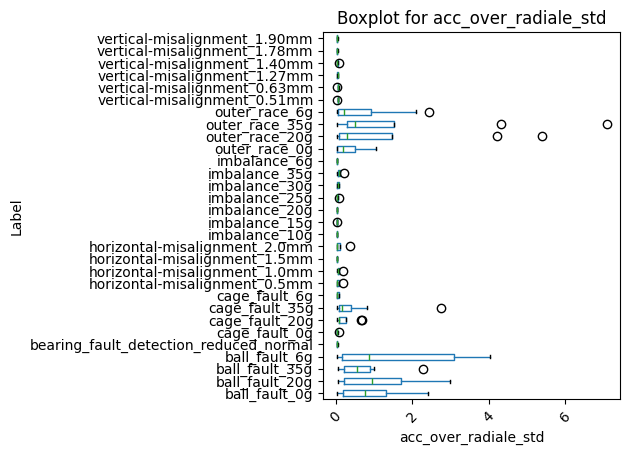

In [8]:
# HAU EZ
# Cargar el archivo combinado
combined_df = pd.read_csv('combined_statistics.csv')

# Excluir la columna 'label' y otras columnas categóricas si las hay
column = 'acc_over_radiale_std'

# Crear un boxplot para cada columna numérica agrupada por 'label'
output_plots_dir = 'boxplots'
os.makedirs(output_plots_dir, exist_ok=True)  # Crear un directorio para guardar los boxplots


plt.figure(figsize=(10, 6))
combined_df.boxplot(column=column, by='label', grid=False, vert=False)
plt.title(f'Boxplot for {column}')
plt.suptitle('')  # Eliminar el título automático de matplotlib
plt.xlabel(column)
plt.ylabel('Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


IN HAU : mapa de color de las correlaciones,
los que estas por debajo de un umbral kitar (de la barianza, kusi denboakiko barianza ze iual ezta eze aldatzen ta ezto ezertako balio)

hacer un PCA a todos los 59, y coger las primeras y vemos cuales son los k más afektan a esta pa coger esas.